### Assignment: Modelling and Simulations 
*Allan G. Schweinfurth*

We start with a preamble, calling the required packages and commands for a functional code.

In [3]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/home/allan
Working Directory has been set to `/home/allan`


### 1. Grid Setup

The first thing we have to do is generate a `Grid2D` object. This is where the ray tracing will be taking place. The `shape_native` value gives the dimension of the grid and the value of `pixel_scales` is the arcsecond-to-pixel conversion factor. 
I.e, for a 250x250 grid and a conversion factor of 0.02", this yields a 5"x5" grid.

In [19]:
grid_2d  = al.Grid2D.uniform(shape_native=(250, 250), pixel_scales=0.02)

We can see this grid with:

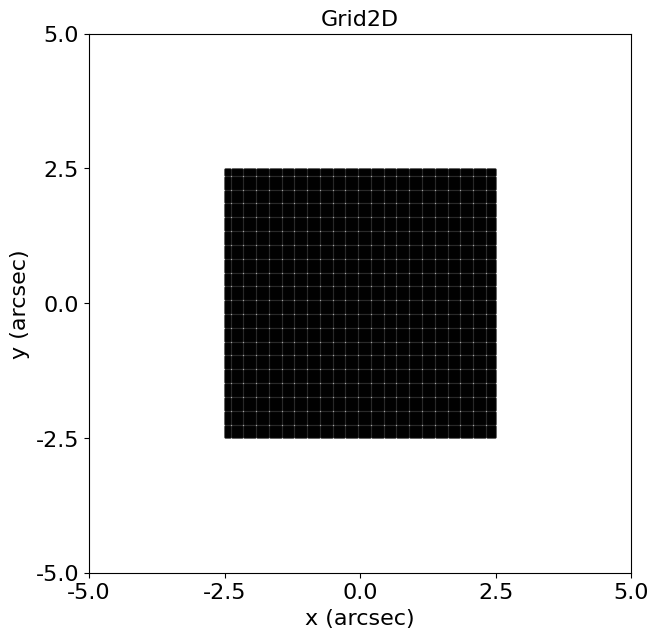

In [18]:
mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="Grid2D")
)

grid_2d_plotter = aplt.Grid2DPlotter(grid=grid_2d, mat_plot_2d=mat_plot_2d)
grid_2d_plotter.figure_2d()

### 2. Galaxies

Next up, we would like to generate the galaxies, which are `al.Galaxy` objects. There's two important distinctions to be made. The `lens_galaxy` and the `source_galaxy`. 
* the `lens_galaxy` is the galaxy closer (lower redshift) to the observer. Its gravity acts as a *lens* and thus the name
* the `source_galaxy` is the galaxy whose light path was distorted by the `lens_galaxy`. It is farther away and has a higher redshift.

All galaxies have certain attributes depending on their morphology, luminosity, mass, etc. These are defined during the object initialisation.

#### 2.1 Lens Galaxy

Let's create our `lens_galaxy` first. We know this galaxy needs to have a mass distribution, and a light distribution. 

In [20]:

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.Isothermal(
        centre=(0,0), 
        ell_comps=(0.0,0.0), 
        einstein_radius=0.5
    ),
    disk=al.lp.ExponentialSph(
        centre=(0,0),
        effective_radius=1,
        intensity=0.75
    ),
    bulge=al.lp.ExponentialCoreSph(
        centre=(0,0),
        effective_radius=0.25,
        intensity=0.01
    )
)

We can see what our `lens_galaxy` look like. For that we define a `galaxy_plotter` object with the galaxy and grid we would like to plot, followed by calling the `.figures_2d(image=True)` method to generate the image

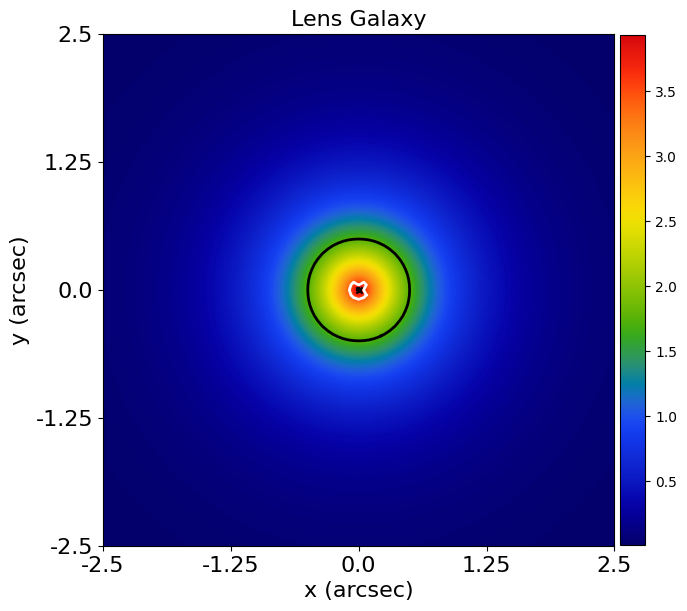

In [43]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=lens_galaxy,grid=grid_2d) 
galaxy_plotter.set_title('Lens Galaxy')
galaxy_plotter.figures_2d(image=True)

Even more, we can see each light profile individually (that of the `Disk` and that of the `Bulge`)

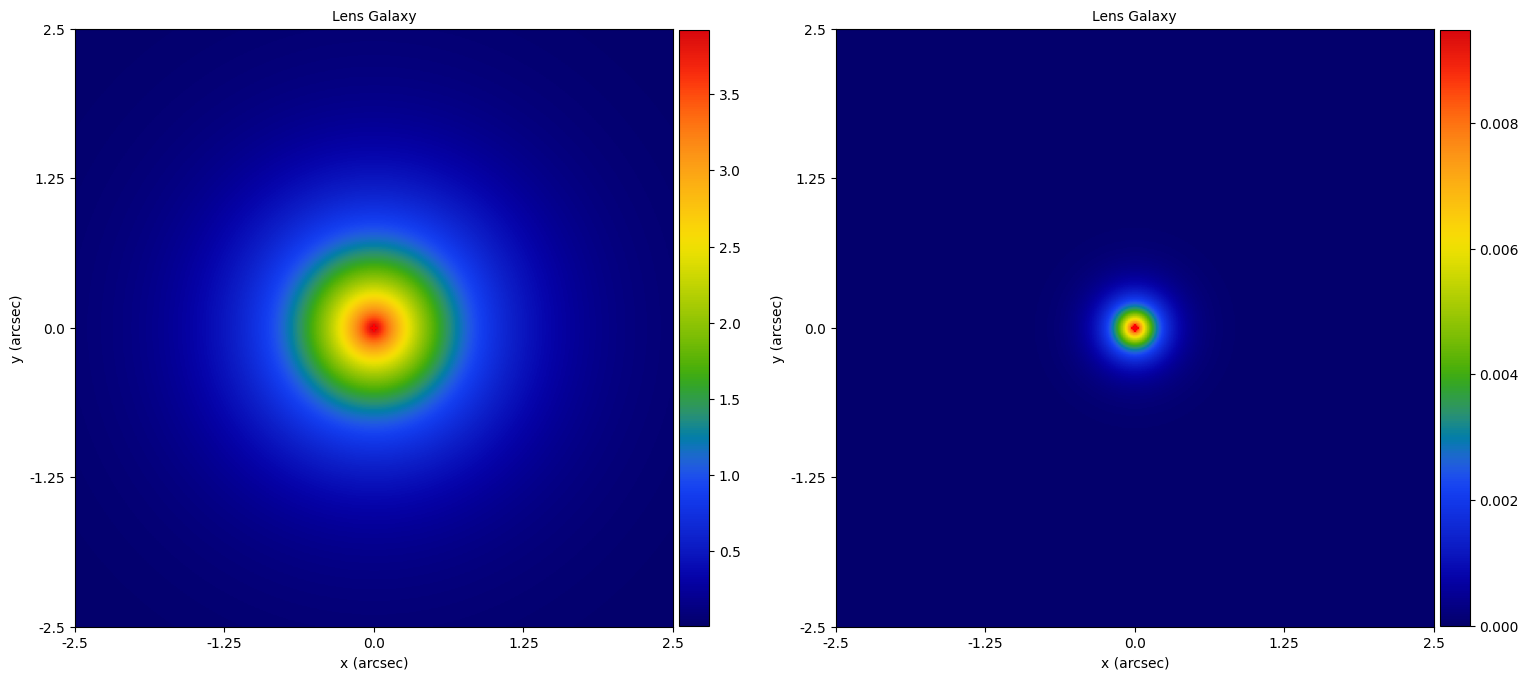

In [44]:
galaxy_plotter.subplot_of_light_profiles(image=True)



#### 2.2 Source Galaxy

Now our `source_galaxy`. Wether or not we define a mass for this galaxy is irrelevant, as only its light plays a role in the lensing process. 

In [29]:
source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.DevVaucouleursSph(
        centre=(0.5, 0), 
        intensity=0.01, 
        effective_radius=0.1
    ),
    disk=al.lp.Exponential(
        centre=(0.5, 0),
        ell_comps=(0.3, 0.5),
        intensity=0.50,
        effective_radius=0.4,
    ),
)

Similarly, we can plot this galaxy by changing the galaxy in the `galaxy_plotter` object

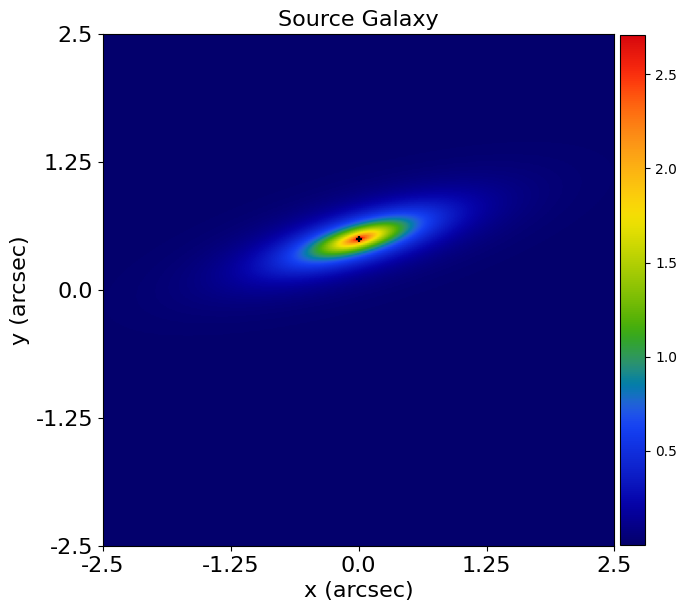

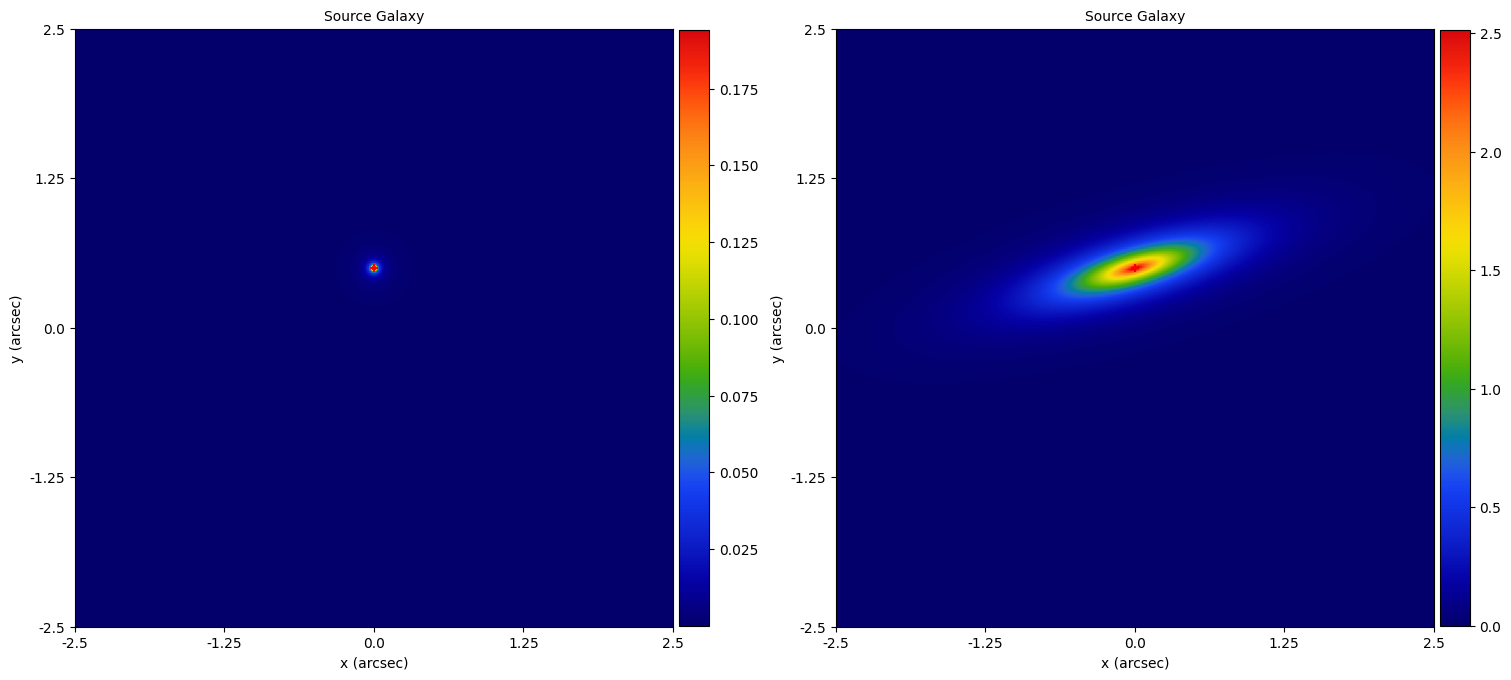

In [42]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=source_galaxy,grid=grid_2d) 
galaxy_plotter.set_title('Source Galaxy')
galaxy_plotter.figures_2d(image=True)
galaxy_plotter.subplot_of_light_profiles(image=True)


A very nice disk galaxy!

### 3. Tracer


The `tracer` is the object that performs the ray tracing. It works with `planes`, where each plane contains a group of galaxies at the same redshift. It also includes a `cosmology` which is used to compute how space gets distorted. We'll be using the `FlatLambdaCDM` model with $H_0$ set at $70 km\cdot s^{-1}/kpc$ and $\Omega_0=0.3$

In [45]:
tracer=al.Tracer.from_galaxies(
    galaxies=[lens_galaxy,source_galaxy],
    cosmology=al.cosmo.FlatLambdaCDM(70,0.3)
)